# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we are going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

### 1. Problem Defination
How well can we predict the future sale price of a bulldozer, given its characterstics and previous examples of how much similar bulldozers have been sold for?


### 2. Data
The data is downloaded from the Kaggle Blue Book for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:
Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more of the evaluation of this project check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimise RMSLE.

### 4. Features












In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('TrainAndValid.csv', low_memory = False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(412698, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalesID,412698.0,2.011161e+06,1.080068e+06,1139246.0,1421897.75,1645852.5,2261012.50,6333349.0
SalePrice,412698.0,3.121518e+04,2.314174e+04,4750.0,14500.00,24000.0,40000.00,142000.0
MachineID,412698.0,1.230061e+06,4.539533e+05,0.0,1088593.25,1284397.0,1478079.25,2486330.0
ModelID,412698.0,6.947202e+03,6.280825e+03,28.0,3261.00,4605.0,8899.00,37198.0
datasource,412698.0,1.351694e+02,9.646749e+00,121.0,132.00,132.0,136.00,173.0
auctioneerID,392562.0,6.585268e+00,1.715841e+01,0.0,1.00,2.0,4.00,99.0
YearMade,412698.0,1.899050e+03,2.921902e+02,1000.0,1985.00,1995.0,2001.00,2014.0
MachineHoursCurrentMeter,147504.0,3.522988e+03,2.716993e+04,0.0,0.00,0.0,3209.00,2483300.0


In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

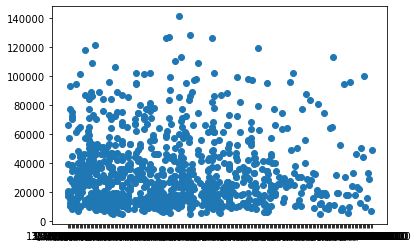

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

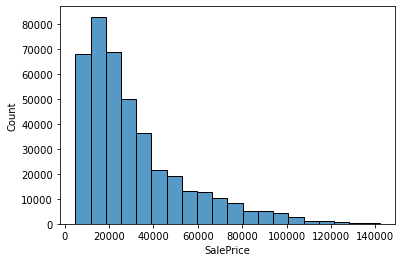

In [9]:
sns.histplot(df['SalePrice'], bins = 20)

### Parsing Dates
When we work with time series data, we want to enrich the time and dat component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the 'parse_dates' parameter

In [ ]:
# Importing data again but this time parse dates

df = pd.read_csv('TrainAndValid.csv', low_memory = False, parse_dates = ['saledate'])

In [ ]:
df.saledate.dtype

In [ ]:
df.saledate[:1000]

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [ ]:
df.head()

In [ ]:
df.head().T

In [ ]:
df.saledate.head(20)

### Sort DataFrame for saledate

When working with time series data, it is good idea to sort it by date.


In [ ]:
# Sort DataFrame in date order
df.sort_values(by = ['saledate'], inplace = True, ascending = True)
df.saledate.head(20)

#### Make a copy of the original DataFrame

We make a copy of the original dataFrame so when we manipulate the copy, we have still got our original data.


In [ ]:
# Make a copy
df_tmp  = df.copy()

In [ ]:
df_tmp.saledate.head(20)